# Project 2
# David Grubman DC-DS-18 Unit | drgrubman@gmail.com
In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [35]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head(3)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

#### Answer: 
*GRE has a much larger rand of data. GPA is more **like** categorical data since it is the average of grade scores (A, B, C, D, ect). A GRE has more exact data points (0-800).*

#### Question 4. Drop data points with missing data


In [6]:
df_raw = df_raw.dropna()
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

#### Answer: 
*Check the counts above! They should all be equal*

#### Question 6. Create box plots for GRE and GPA

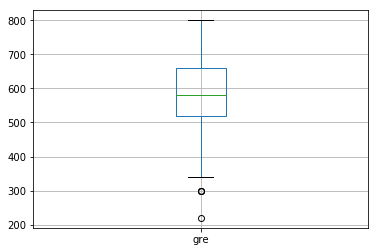

In [7]:
#boxplot 1
df_raw.boxplot(column='gre')

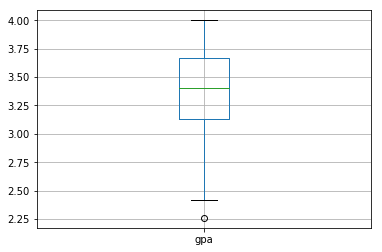

In [8]:
#boxplot 2 
df_raw.boxplot(column='gpa')

#### Question 7. What do this plots show?

Answer: The plots demonstrate outlifers, min, max, median, and the 25th and 75th percentiles (Q1 and Q3).

#### Question 8. Describe each distribution 

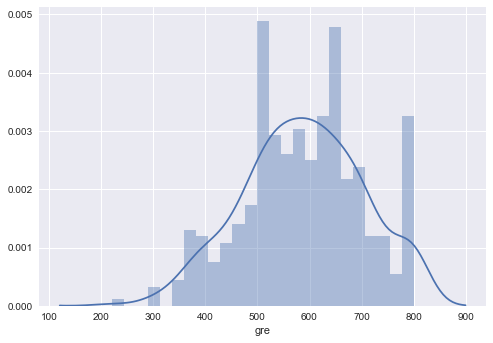

In [26]:
# plot the distribution of each variable 
# me likey seaborn
import seaborn as sns
sns.distplot(df_raw['gre'], bins=25)

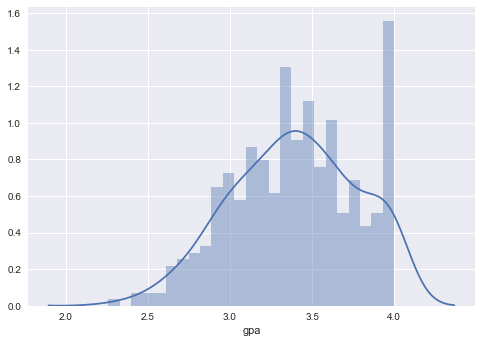

In [27]:
sns.distplot(df_raw['gpa'], bins=25)

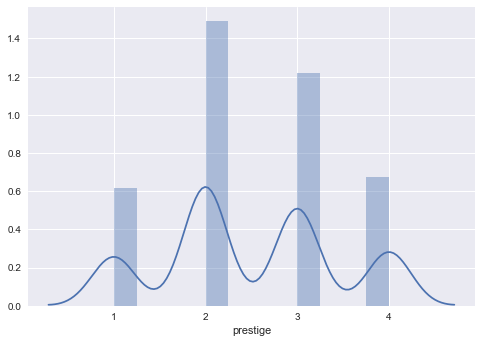

In [17]:
sns.distplot(df_raw['prestige'])
#sorta interesting?

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The model would assume normal distribution for GRE and GPA. Since prestige is categorical, it is hard to say it's normal. GPA may fail a normality test because so many grades are 4.0.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 
From my understanding, the biggest difficulty is the number of people that get 4.0 GPA's. Thanks grade inflation! 

#### Question 11. Which of our variables are potentially colinear? 

In [16]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


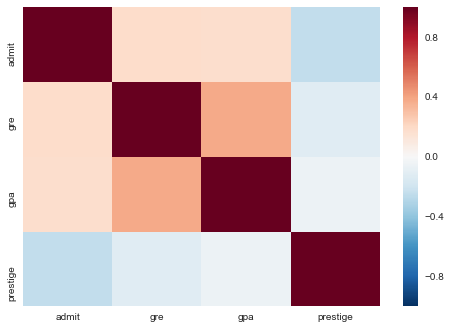

In [33]:
corr = df_raw.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Question 12. What did you find?

Answer: *No pairs have correlations very close to 1. GPA and GRE have the highest correlation, but it will not be a problem when running the analysis.*

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

#### I believe we can just test for 

Analysis plan

**Is there an assocation between grad school admission rates and the "prestige" of undergraduate schools?**

1. Research and understand the data source.
2. Build data dictionary
3. Test for missing data/ non-integer values. 
4. Visualize and do basic *pd.describe()* functions
5. Test for outliers.
6. Make the prestige column "dummy data" since it can only be 1-4. 
7. Test for correlation between grad school admissions and prestige using pandas.corr()
8. Create a heat map that makes it visually appealing!


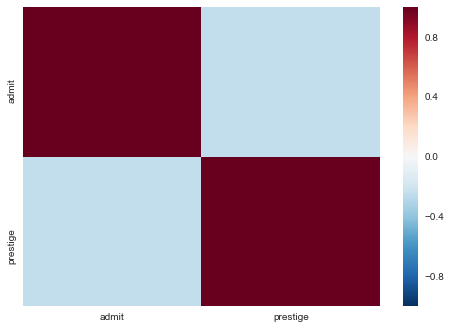

In [32]:
df_grad_prestige = df_raw[['admit','prestige']]
corr = df_grad_prestige.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Question 14. What is your hypothesis? 

Answer: There is no association between prestige and grad school admissions.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
Only accept values between a certain range. For instance, it doesn't make sense to have a GPA of 0 or GRE score of 0. You could also fill in values with medians or means of the column, if needed.

#### 2. Bonus: Log transform the skewed data

In [43]:
df_original = pd.read_csv("../assets/admissions.csv")
df_original['log_gre'] = np.log(df_original['gre'])
df_original['log_gpa'] = np.log(df_original['gpa'])
df_original['log_prestige'] = np.log(df_original['prestige']) # not sure this is useful because of categorical data
df_original.head(5)

,admit,gre,gpa,prestige,log_gre,log_gpa,log_prestige
0,0,380.0,3.61,3.0,5.940171,1.283708,1.098612
1,1,660.0,3.67,3.0,6.492240,1.300192,1.098612
2,1,800.0,4.00,1.0,6.684612,1.386294,0.000000
3,1,640.0,3.19,4.0,6.461468,1.160021,1.386294
4,0,520.0,2.93,4.0,6.253829,1.075002,1.386294


#### 3. Advanced: Impute missing data

In [37]:
df_original = pd.read_csv("../assets/admissions.csv")

In [38]:
df_original = df_original.fillna(df_original.mean())
df_original.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Performance Evaluation

| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Read in your dataset, determine how many samples are present, and ID any missing data | | |X  | |
| Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation) | | |X| |
| Describe the distributions of your data | |X| | |
| Plot box plots for each variable | | |X| |
| Create a covariance matrix | | |X| |
| Determine any issues or limitations, based on your exploratory analysis | |X| | |
| Outline exploratory analysis methods | | |X| |
| Bonus points: 2 |

Notes:
- Smooth dropping of the data. You can always use "inplace=True" in the dropna() statement instead of redefining your dataframe. 
- Good explanation of the different standard deviation ranges. 
- Your check for nulls is one way to do it. But what if there were 3 blanks in each columns, but from different rows? You'd get the same result but still have nulls. Try .isnull().sum()
- Good plots for your distributions. It would be good for you to include a few sentences explaining what you see - not just what these types of plots mean, but what they show for this particular project. 
- Instead of saying it "may" fail a normality test, why not run one? Try KStest or normaltest. 
- Agreed on the source of the skewness, but what would you do to correct it? Normalization could be useful here. 
- Correct interpretation of the correlations/covariances. What would you use as your cutoff - where would you say there is a correlation worth worrying about? 
- Great job including "research" as the first step of your exploratory analysis!! That's such a huge piece that so many people miss. 
- In your exploratory analysis, how would you interpret the results of your test for correlation? What would be a "meaningful" correlation? This relates to your interpretation earlier. 
- How would you test for outliers? 
- Also don't forget to drop one of the dummy variables. 
- Also also, glad you included the visualization step in your plan! That's another one that gets missed. 
- Good bonus work as well. When imputing, make sure you justify your choice - why impute the mean instead of 0, or the median? How else could you impute in a more complex way? (There are lots of methods for this) 

---

## Score:
Based on the requirements, you can earn a maximum of  **21**  points on this project. 

#### Your total score is: **14**